In [2]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [3]:
# Importing the libraries for the layers of CNN
import tensorflow as tf
from tensorflow.keras.models import Sequential

In [5]:
import matplotlib.pyplot as plt
from skimage.transform import resize

In [6]:
from keras.models import Sequential
# importing adam optimizer from keras optimizer module

# train_test_split to create training and validation set
from sklearn.model_selection import train_test_split
# accuracy_score to calculate the accuracy of predictions

In [7]:
import pandas as pd
import numpy as np

In [8]:
train_path="/content/drive/MyDrive/DL_Hackathon/dataset/train"
real_path="/content/drive/MyDrive/DL_Hackathon/dataset/train/training_real"
fake_path="/content/drive/MyDrive/DL_Hackathon/dataset/train/training_fake"

In [9]:
train_df = pd.read_csv('/content/drive/MyDrive/DL_Hackathon/train_(1)_(1).csv')
train_df.head()

,file_id,label
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [10]:
# training_image_list = list()

In [11]:
# for idx in train_df.file_id:
#     if(idx <= 759):
#         img = plt.imread(train_path,fake_path + str(idx)+".jpg")
#     else:
#         img = plt.imread(train_path,real_path + str(idx)+".jpg")
#     resize_img = resize(img, output_shape=(175,175))
#     training_image_list.append(resize_img)

In [12]:

import os
training_image_list = []

for idx in train_df.file_id:
    # Determine the correct path based on the file ID
    if idx <= 759:
        img_path = os.path.join(train_path, fake_path, f"{idx}.jpg")
    else:
        img_path = os.path.join(train_path, real_path, f"{idx}.jpg")

    # Check if the file exists
    if not os.path.exists(img_path):
        print(f"File not found: {img_path}")
        continue

    # Read and resize the image
    img = plt.imread(img_path)
    resize_img = resize(img, output_shape=(100, 100))
    training_image_list.append(resize_img)
    print(f"Processed image ->{idx}")

print(f"Processed {len(training_image_list)} images.")

Processed image ->0
Processed image ->1
Processed image ->2
Processed image ->3
Processed image ->4
Processed image ->5
Processed image ->6
Processed image ->7
Processed image ->8
Processed image ->9
Processed image ->10
Processed image ->11
Processed image ->12
Processed image ->13
Processed image ->14
Processed image ->15
Processed image ->16
Processed image ->17
Processed image ->18
Processed image ->19
Processed image ->20
Processed image ->21
Processed image ->22
Processed image ->23
Processed image ->24
Processed image ->25
Processed image ->26
Processed image ->27
Processed image ->28
Processed image ->29
Processed image ->30
Processed image ->31
Processed image ->32
Processed image ->33
Processed image ->34
Processed image ->35
Processed image ->36
Processed image ->37
Processed image ->38
Processed image ->39
Processed image ->40
Processed image ->41
Processed image ->42
Processed image ->43
Processed image ->44
Processed image ->45
Processed image ->46
Processed image ->47
Pr

In [13]:
image_list = np.array(training_image_list)
image_list.shape

(1709, 100, 100, 3)

In [14]:
#Normalization
image_list = image_list/image_list.max()

In [15]:
y = train_df['label']
y.shape

(1709,)

In [16]:
X=image_list

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1196, 100, 100, 3) (1196,) (513, 100, 100, 3) (513,)


In [19]:
# # defining the model architecture

# # creating a sequential model
# model = Sequential()

# # defining input layer with 3D input of shape (224,224,3)
# model.add(InputLayer(shape=(200, 200, 3)))

# # defining the first convolutional layer with 25 filters of size (5,5)
# model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
# # defining the second convolutional layer with 50 filters of size (5,5)
# model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))

# # flattening the output from convolutional layers so that it can be forwarded to the dense layers
# model.add(Flatten())

# # defining the first dense or fully connected layer with 100 neurons
# model.add(Dense(units=100, activation='sigmoid'))
# # defining the output layer with 1 neuron since it is a binary classification problem
# model.add(Dense(units=1, activation='sigmoid'))

In [20]:
from tensorflow import keras
from tensorflow.keras import layers
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(100,
                                  100,
                                  3)),
    #layers.RandomRotation(0.01),
    layers.RandomZoom(0.1),
  ])
rescale = tf.keras.Sequential([
  layers.Rescaling(1./255)
])

model = Sequential([
  data_augmentation,
  rescale,
  layers.Conv2D(60, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(125, 3, padding='same', activation='relu'),
  layers.Conv2D(125, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(250, 3, padding='same', activation='relu'),
  layers.Conv2D(250, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(250, 3, padding='same', activation='relu'),
  layers.Conv2D(250, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(300, activation='relu'),
  layers.BatchNormalization(),
  layers.Dropout(0.2),
  layers.Dense(300, activation='relu'),
  layers.BatchNormalization(),
  layers.Dropout(0.2),
  layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 100, 100, 60)        │           1,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 100, 100, 60)        │             240 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 50, 50, 60)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 50, 50, 125)         │          67,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 50, 50, 125)         │         140,750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 50, 50, 125)         │             500 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 25, 25, 125)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 25, 25, 250)         │         281,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 25, 25, 250)         │         562,750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 25, 25, 250)         │           1,000 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 250)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 250)         │         562,750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 12, 12, 250)         │         562,750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 12, 12, 250)         │           1,000 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 250)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │       2,700,300 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,975,846 (18.98 MB)

 Trainable params: 4,973,276 (18.97 MB)

 Non-trainable params: 2,570 (10.04 KB)

In [22]:
# compiling the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [23]:
# training the model
model_history = model.fit(X_train, y_train, epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 120ms/step - accuracy: 0.5103 - loss: 0.9433 - val_accuracy: 0.5478 - val_loss: 0.7143
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.5266 - loss: 0.8160 - val_accuracy: 0.4522 - val_loss: 0.7812
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.5460 - loss: 0.7778 - val_accuracy: 0.5478 - val_loss: 0.7118
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.5933 - loss: 0.7135 - val_accuracy: 0.4522 - val_loss: 0.7725
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.5771 - loss: 0.7279 - val_accuracy: 0.5478 - val_loss: 0.7863
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.5731 - loss: 0.7148 - val_accuracy: 0.5478 - val_loss: 0.7392
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.5694 - loss: 0.6972 - val_accuracy: 0.4522 - val_loss: 1.1572
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.5917 - loss: 0.6970 - val_accuracy: 0.5478 -

In [24]:
from tensorflow.keras.applications import DenseNet121

In [25]:
dense_mod = DenseNet121(weights='imagenet', include_top=False, input_shape=(100,100,3))
for layer in dense_mod.layers[-10:]:
    layer.trainable=True

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [26]:
x=dense_mod.output
x=tf.keras.layers.GlobalAveragePooling2D()(x)
x=tf.keras.layers.Dense(500, activation='relu')(x)
predictions=tf.keras.layers.Dense(1, activation='sigmoid')(x)
model1=tf.keras.Model(inputs=dense_mod.input, outputs=predictions)
model1.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])


In [27]:
model1.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 100, 100, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d            │ (None, 106, 106, 3)    │              0 │ input_layer_3[0][0]    │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 50, 50, 64)     │          9,408 │ zero_padding2d[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 50, 50, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 50, 50, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_1          │ (None, 52, 52, 64)     │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 25, 25, 64)     │              0 │ zero_padding2d_1[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 25, 25, 64)     │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 25, 25, 64)     │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 25, 25, 128)    │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 25, 25, 128)    │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 25, 25, 128)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 25, 25, 32)     │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 25, 25, 96)     │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├──────────────────────

 Total params: 7,550,505 (28.80 MB)

 Trainable params: 7,466,857 (28.48 MB)

 Non-trainable params: 83,648 (326.75 KB)

In [28]:
model1_history = model1.fit(X_train, y_train, epochs=18,validation_data=(X_test,y_test))

Epoch 1/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 182s 2s/step - accuracy: 0.5190 - loss: 0.7534 - val_accuracy: 0.4620 - val_loss: 1.1728
Epoch 2/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 51s 92ms/step - accuracy: 0.8138 - loss: 0.4361 - val_accuracy: 0.4912 - val_loss: 1.0618
Epoch 3/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.9513 - loss: 0.2261 - val_accuracy: 0.6238 - val_loss: 0.7437
Epoch 4/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.9912 - loss: 0.1114 - val_accuracy: 0.5458 - val_loss: 1.0776
Epoch 5/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.9772 - loss: 0.0907 - val_accuracy: 0.6589 - val_loss: 0.7729
Epoch 6/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.9961 - loss: 0.0421 - val_accuracy: 0.6628 - val_loss: 0.7740
Epoch 7/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 1.0000 - loss: 0.0232 - val_accuracy: 0.6277 - val_loss: 0.8881
Epoch 8/18
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.9965 - loss: 0.0235 - val_accuracy: 0.6530 - 

In [29]:
test_df = pd.read_csv("/content/drive/MyDrive/DL_Hackathon/test_(1)_(1).csv")
test_df.head()

,file_id
0,0
1,1
2,2
3,3
4,4


In [30]:
test_files_path = "/content/drive/MyDrive/DL_Hackathon/dataset/test/"

In [31]:
test_image_list = list()

In [32]:
# for idx in test_df.file_id:
#     img = plt.imread(test_files_path + str(idx)+".jpg")
#     resize_img = resize(img, output_shape=(100,100))
#     test_image_list.append(resize_img)
#     print(f"Processed: {[idx]}")

In [33]:
test_image_list = []
for idx in test_df.file_id:
    file_path = test_files_path + str(idx) + ".jpg"
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        continue
    try:
        img = plt.imread(file_path)
        resize_img = resize(img, output_shape=(100, 100))
        test_image_list.append(resize_img)
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")

In [34]:
test_image_list = np.array(test_image_list)
test_image_list.shape

(332, 100, 100, 3)

In [35]:
#Normalization
test_image_list = test_image_list/test_image_list.max()

In [36]:
output_prob = model1.predict(test_image_list)

11/11 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step


In [37]:
test_image_list[0].shape

(100, 100, 3)

In [38]:
output_prob[31]

array([0.9332131], dtype=float32)

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt

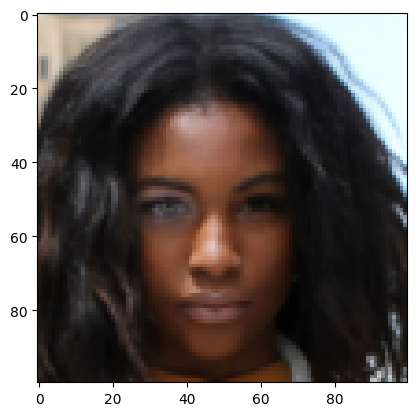

In [40]:
plt.imshow(test_image_list[42])
plt.show()

In [41]:
output_df = pd.DataFrame({"file_id":test_df.file_id, "label":pd.Series()})

In [42]:
for i in range(output_df.shape[0]):
    output_df.loc[i, "label"] = 0 if output_prob[i] <0.93 else 1

In [43]:
output_df.head(20)

,file_id,label
0,0,0
1,1,0
2,2,0
3,3,0
4,4,1
5,5,0
6,6,1
7,7,0
8,8,0
9,9,0


In [44]:
output_df.to_csv("/content/drive/MyDrive/DL_Hackathon/Output_per.csv", index=False)

In [46]:
model1.save("/content/drive/MyDrive/DL_Hackathon/DL_Model_DenseNet121.h5")